In [2]:
%matplotlib inline
import os

import pystan
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import arviz as az

## gengerated quantitiesブロックの使用例


In [3]:
# データ読み込み
file_beer_sales_ab = pd.read_csv('book-data/2-6-1-beer-sales-ab.csv')
file_beer_sales_ab.head()

,sales,beer_name
0,87.47,A
1,103.67,A
2,83.29,A
3,131.91,A
4,106.59,A


C:\Users\s44990\AppData\Local\Programs\Python\virtualenvs\py38_pystan2_17\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\s44990\AppData\Local\Programs\Python\virtualenvs\py38_pystan2_17\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


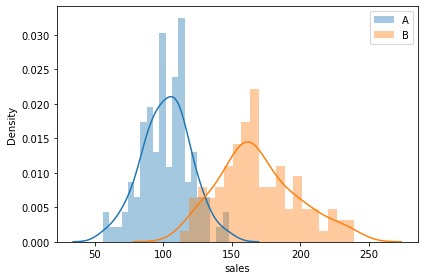

In [4]:
# ヒストグラムの作成
sns.distplot(file_beer_sales_ab.query("beer_name == 'A'")['sales'], bins=20, label='A')
sns.distplot(file_beer_sales_ab.query("beer_name == 'B'")['sales'], bins=20, label='B')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# stan用データの作成
sales_a = file_beer_sales_ab.query("beer_name == 'A'")['sales']
sales_b = file_beer_sales_ab.query("beer_name == 'B'")['sales']

sample_size = len(sales_b)
print(sample_size)

stan_data = {
    'N': 100,
    'sales_a': sales_a,
    'sales_b': sales_b
}

100


In [6]:
# stanファイルの読み込み
if os.path.exists('2-6-5-difference-mean.pkl'):
    sm = pickle.load(open('2-6-5-difference-mean.pkl', 'rb'))
else:
    # a model using prior for mu and sigma.
    sm = pystan.StanModel(file='book-data/2-6-5-difference-mean.stan')

# MCMCの実行
mcmc_result_6 = sm.sampling(
    data=stan_data,
    seed=1,
    chains=4,
    iter=2000,
    warmup=1000,
    thin=1
)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_14ecbf560cc514f13743d8ba4cd8d75c NOW.
C:\Users\s44990\AppData\Local\Programs\Python\virtualenvs\py38_pystan2_17\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\s44990\AppData\Local\Temp\tmpi4er0xsm\stanfit4anon_model_14ecbf560cc514f13743d8ba4cd8d75c_3805011054827054703.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_14ecbf560cc514f13743d8ba4cd8d75c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_a    102.16    0.03   1.79  98.59 100.96 102.13 103.38 105.64   4000    1.0
sigma_a  18.17    0.02   1.33  15.83  17.25  18.08  18.98  20.99   4000    1.0
mu_b    168.89    0.05   2.86 163.33 166.99 168.85 170.85 174.49   3988    1.0
sigma_b  29.12    0.03   2.04  25.46  27.69  29.01  30.39  33.48   4000    1.0
diff     66.73    0.05   3.35  59.97  64.39  66.77  68.97  73.11   4000    1.0
lp__    -719.3    0.03   1.38 -722.7 -720.0 -719.0 -718.3 -717.6   2099    1.0

Samples were drawn using NUTS at Fri Aug 27 14:22:23 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


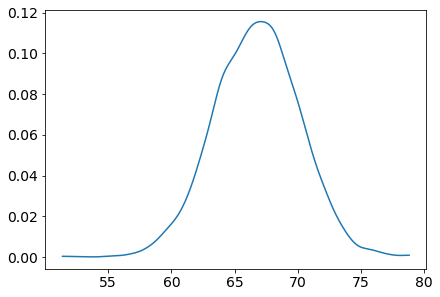

In [7]:
# 結果表示
print(mcmc_result_6)

mcmc_samples = mcmc_result_6.extract()
az.plot_kde(mcmc_samples['diff'])
plt.show()

# saving complied model
if not os.path.exists('2-6-5-difference-mean.pkl'):
    with open('2-6-5-difference-mean.pkl', 'wb') as f:
        pickle.dump(sm, f)